# BCI Forecaster

#### The Business confidence index (BCI)


- The business development index provides information on future business development.

- This is mainly driven by opinion surveys on production, orders and stocks of finished products in multiple industry sectors.

- Just like the CLI, many economist belive that the BCI is a leading indicator and can be used to monitor and anticipate market turning points.

- Big Manufacturers and Firms may hold back on planned investments and reduce their production or service if the business confidence is low. This can lead to a market contraction as labour demand drops which is shortly followed by a decline in aggregate consumer demand.(weaker expectation can be self fulfilling)



#### What are we looking at?


- What we are looking at is an aggregate of economic information from 37 countries.

- The OECD BCI is made of 170 reports and it covers many short term indicators within it; each country contributes 5-10 reports monthly.

Some of the BCI survey questions to big firms include:
- Firms are asked about their expectation in next 6-12 months
- Strengths and weaknesses in order book
- Plan to raise prices of goods
- Plans for employment in the months ahead ...etc



#### How does the indicator work?

- When BCI value is above 100 it suggest an increase in confidence for business performance whilst values below 100 indicate pessimism towards business performance.


#### How can I use it?

-  if you are a trend-follower, when the BCI is rising or at least above 100 and the markets are trending up you can assume bullishness and vice versa. When they don't agree or worse when they really don't agree, one should be very concerned - as it's hard to know which side is right, it may be best to minimize risk and wait things out.

***Look at the Composite Leading indicator notebook for more detailed breakdown of the code***

In [6]:
import matplotlib 
import matplotlib.pyplot as plt 
import pandas_datareader as dt
import io, base64, os, json, re , math
import pandas as pd 
import numpy as np
import datetime
import warnings
import calendar
import statsmodels.api as sm
import datetime
from dateutil import relativedelta

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#load the cli data
bci_raw=pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/OECD.BCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
bci_df=bci_raw[bci_raw['LOCATION'] =='OECD']
    
full_date_list=[]
for tm in bci_df['TIME']:
    year=int(tm.split('-')[0])
    month=int(tm.split('-')[1])
    #print calendar full date
    full_date_list.append(tm + '-'+str(calendar.monthrange(year,month)[1]))
        
bci_df['Date'] = full_date_list
bci_df['Date']= pd.to_datetime(bci_df['Date'])
bci_df=bci_df[['Date','Value']]
bci_df.index=bci_df['Date']
    

In [19]:
#Get SP500 index
#We will be using only the Adj close prices
all_spx_data= dt.DataReader('^GSPC', 'yahoo', start='01-01-1970')

#all_spx_data['Date'] = pd.to_datetime(all_spx_data['Date'])

spx_data=all_spx_data[['Adj Close']]

#sort data from oldest to newest
spx_data=spx_data.sort_values('Date', ascending=True)


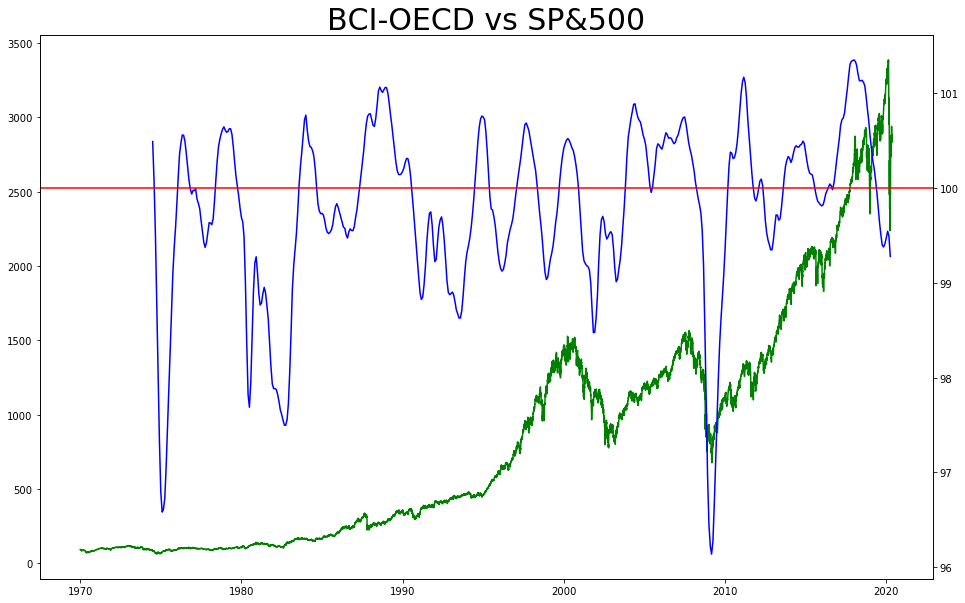

In [23]:
#Plot the SP500 and BCI index
fig, ax = plt.subplots(figsize=(16, 10))

plt.plot(spx_data, label='BCI', 
         color='green')


second_axis= ax.twinx()

plt.plot(bci_df['Date'], bci_df['Value'], label='BCI', 
         color='blue')

plt.title('BCI-OECD vs SP&500', fontsize=30)

second_axis.axhline(y=100, color='red')


- We can see here that the BCI started to decline a few months before the SPX dropped in early 2020.


- There are other instances where the BCI seems to be leading the market downturns when it goes below the 100; i.e during the 2008 crash

In [15]:

#Global Variable
exp_smooth_fit=None
bci_df=None

# load and prepare the data
def Startup():
    #The variables we will need after function runs
    global exp_smooth_fit, bci_df
    
    #load the cli data
    bci_raw=pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/OECD.BCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
    bci_df=bci_raw[bci_raw['LOCATION'] =='OECD']
    
    full_date_list=[]
    for tm in bci_df['TIME']:
        year=int(tm.split('-')[0])
        month=int(tm.split('-')[1])
        #print calendar full date
        full_date_list.append(tm + '-'+str(calendar.monthrange(year,month)[1]))
        
    bci_df['Date'] = full_date_list
    bci_df['Date']= pd.to_datetime(bci_df['Date'])
    bci_df=bci_df[['Date','Value']]
    bci_df.index=bci_df['Date']
    
    
    
    
    #train the model on all existing data
    exp_smooth_fit=sm.tsa.ExponentialSmoothing(bci_df['Value'], seasonal_periods=43,
                                              trend='add', seasonal='add', damped=True).fit()
    
    
def GetForecast(months_out):
    
    new_dates=[]
    for month_ in range(1,months_out+1):
        nextmonth=pd.to_datetime(str(bci_df['Date'].values[-1]))+relativedelta.relativedelta(month=month_)
        new_dates.append(nextmonth)
    

   
    
    new_data= exp_smooth_fit.forecast(months_out)
    future_df=pd.DataFrame({'Date':new_dates,'Value':new_data})
    future_df.index=future_df['Date']
    
    print(bci_df['Date'][-1])
    print(future_df['Date'][0])
    
    fig,ax = plt.subplots(figsize=(16,10))
    plt.plot(future_df['Value'], label='Holt Winter Forcast', linewidth=5)
    plt.plot(bci_df['Value'], label='Train')

    ax.axhline(y=100,color='gray')
    plt.legend(loc='best')
    plt.title('BCI Forecast Util '+ str(future_df['Date'].values[-1])[0:10])
    plt.show()
    

In [16]:
Startup()

2020-03-31 00:00:00
2020-01-31 00:00:00


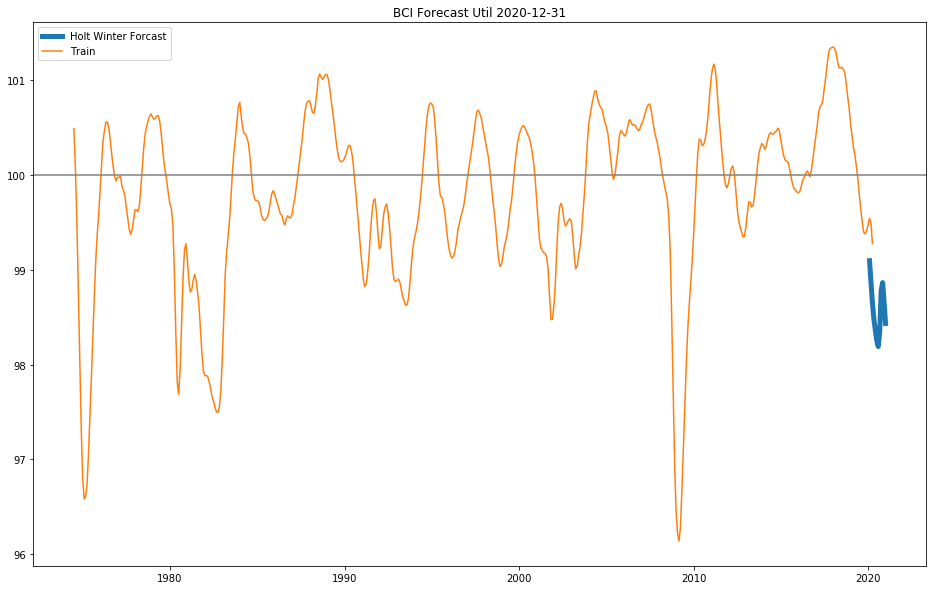

In [18]:
GetForecast(12)